In [1]:
import torch
from torch import nn

torch.__version__

'2.2.0.dev20230922+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Sun Oct 15 02:54:46 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1080 Ti   WDDM  | 00000000:07:00.0  On |                  N/A |
| 42%   62C    P0              66W / 250W |   1323MiB / 11264MiB |      9%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
if not image_path.is_dir():
    image_path.mkdir(parents=True, exist_ok=True)
else:
    print(f"{image_path} directory exists, skipping folder creation.")
    pass

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data...")
    f.write(request.content)
    print("Data downloaded...")

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Extracting data...")
    zip_ref.extractall(image_path)
    print("Data extracted...")


data\pizza_steak_sushi directory exists, skipping folder creation.
Data downloaded...
Extracting data...
Data extracted...


In [5]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random Image Path: data\pizza_steak_sushi\train\pizza\3441394.jpg
Image class: pizza
Image mode: RGB
Image size: (512, 512)


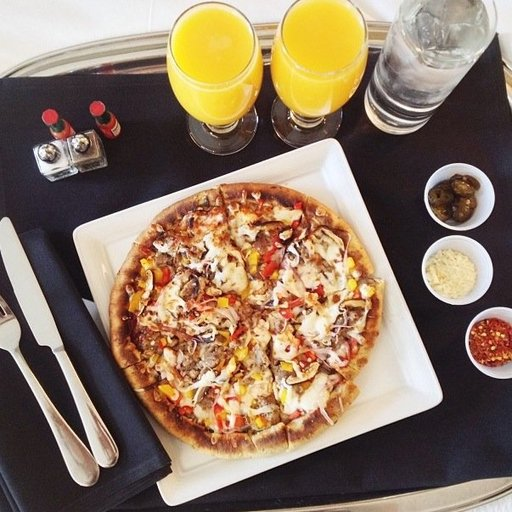

In [7]:
import random 
from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
random_image_path

image_class = random_image_path.parent.name


img = Image.open(random_image_path)

print(f"Random Image Path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image mode: {img.mode}")
print(f"Image size: {img.size}")
img

Image Class: pizza | Shape: (512, 512, 3) | Data Type: uint8


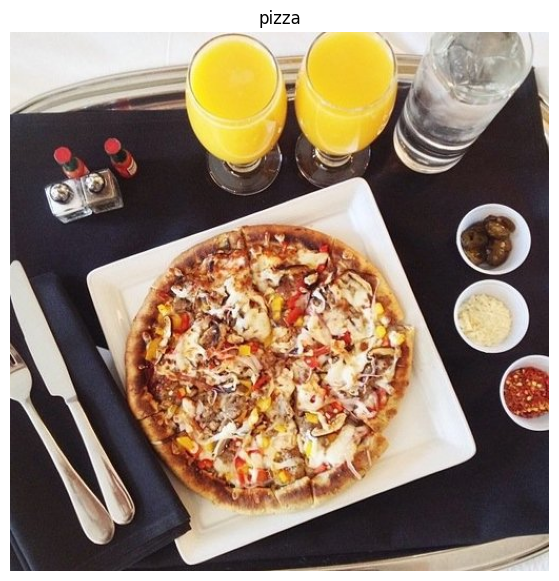

In [8]:
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(image_class)
plt.axis(False);
print(f"Image Class: {image_class} | Shape: {image_as_array.shape} | Data Type: {image_as_array.dtype}")

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

In [13]:
data_transform(img).shape

torch.Size([3, 64, 64])

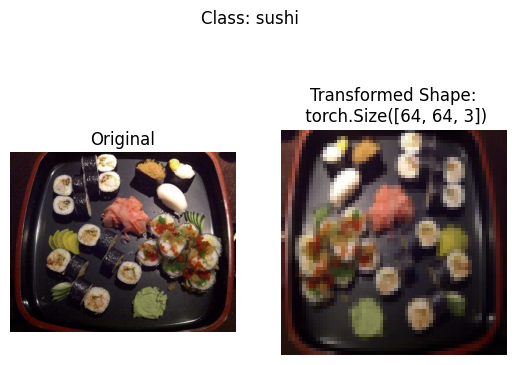

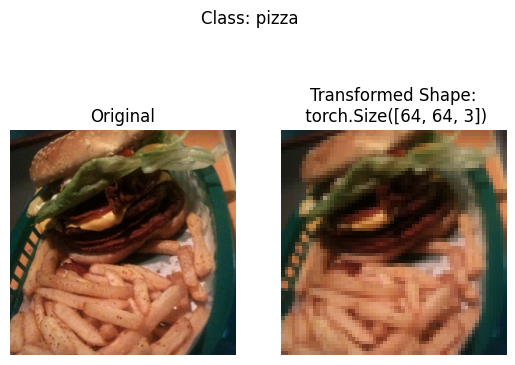

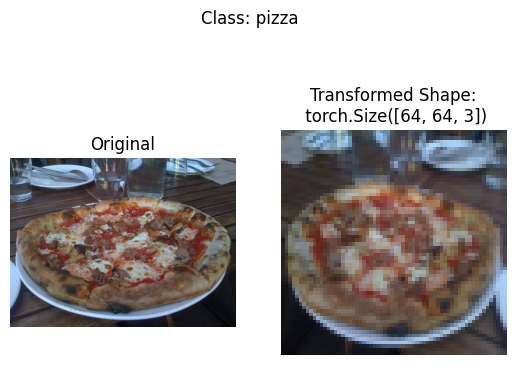

In [20]:
def plot_transform_images(image_paths, transform, n =3, seed=42):
    """
    Selects random images from a path of images and loads/transforms
    them then plots the original vs the transformer version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title("Original")
            ax[0].axis("off")
            ax[1].imshow(transform(f).permute(1, 2, 0))
            ax[1].set_title("Transformed Shape:\n " + str(transform(f).permute(1, 2, 0).shape))
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.name}")

plot_transform_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)
            

In [21]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir, 
                                  transform=data_transform, 
                                  target_transform=None
                                  )

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform, 
                                 target_transform=None
                                 )

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [23]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [24]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [25]:
len(train_data), len(test_data)

(225, 75)